# DICE ROLLING SIMULATION

We want to know, if we roll a dice 6 times, what is the probability for each sequence/combination of numbers. Based on the below theory, all the sequences should have the same probability (1/6 ^ 6) = 0.0021433%.

Let's do some experiments and analyze the results

https://www.datacamp.com/community/tutorials/statistics-python-tutorial-probability-1

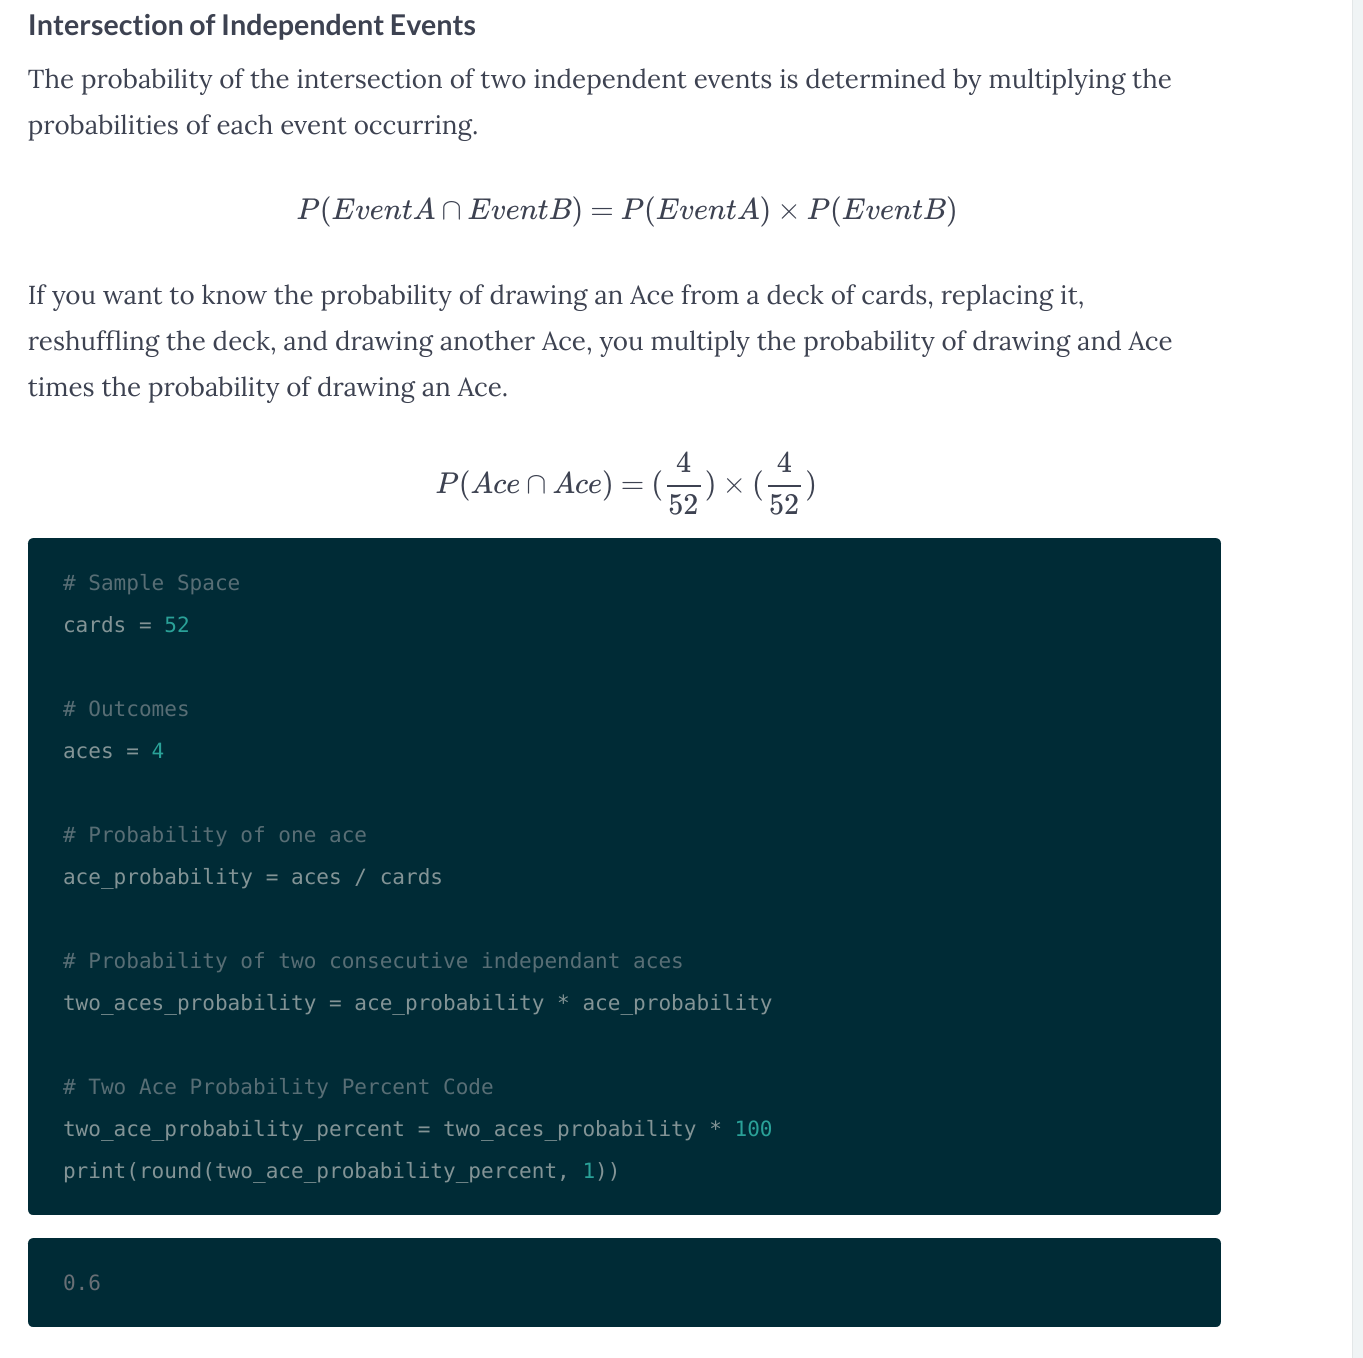

In [1]:
from IPython.display import Image
Image(filename='/home/ainhoa/Downloads/Image.png')

## EXPERIMENT 1: SIZE OF THE SAMPLE: 1 MILLION

In [1]:
#Let's define our random sample generator as:
import random
import pandas as pd
def jugada(n=int):
    resultados = {'Secuencia': []}
    for i in range(n):
        secuencia = [random.randint(1,6) for i in range(6)]
        resultados['Secuencia'].append(secuencia)
    return pd.DataFrame(data=resultados)

In [14]:
#We generate a 1 million sample and save it:
%%timeit
ejemplo = jugada(1000000)
ejemplo.to_csv('ejemplo.csv',index=False,sep='^', encoding='utf-8')

5.53 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
#We can now load it as a dataframe:
import numpy as np
resultados = pd.read_csv('ejemplo.csv', header=0, sep='^', encoding='utf-8')
resultados['Cuenta'] = np.ones(len(resultados))
resultados.head()

,Secuencia,Cuenta
0,"[4, 4, 4, 4, 2, 2]",1.0
1,"[1, 5, 1, 3, 5, 1]",1.0
2,"[2, 3, 1, 1, 6, 3]",1.0
3,"[4, 6, 1, 6, 5, 4]",1.0
4,"[2, 3, 4, 3, 1, 4]",1.0


In [3]:
#We can now count how many times each sequence appears in our sample (note that the order
#of appearance matters, as [1,2,3] is not the same as [3,2,1]):
frecuencia = pd.DataFrame(pd.pivot_table(resultados,index=['Secuencia'],values=['Cuenta'],aggfunc=[sum]))
frecuencia.reset_index(inplace=True)
frecuencia.columns = frecuencia.columns.droplevel(1)
frecuencia.head()

,Secuencia,sum
0,"[1, 1, 1, 1, 1, 1]",26.0
1,"[1, 1, 1, 1, 1, 2]",25.0
2,"[1, 1, 1, 1, 1, 3]",20.0
3,"[1, 1, 1, 1, 1, 4]",15.0
4,"[1, 1, 1, 1, 1, 5]",19.0


In [5]:
#We can now add a column for the percentage (or probability) for each sequence:
frecuencia['Probabilidad'] = frecuencia['sum']/1000000
frecuencia.head()

,Secuencia,sum,Probabilidad
0,"[1, 1, 1, 1, 1, 1]",26.0,0.000026
1,"[1, 1, 1, 1, 1, 2]",25.0,0.000025
2,"[1, 1, 1, 1, 1, 3]",20.0,0.000020
3,"[1, 1, 1, 1, 1, 4]",15.0,0.000015
4,"[1, 1, 1, 1, 1, 5]",19.0,0.000019


In [6]:
print(frecuencia['Probabilidad'].sum(axis=0))

1.0


In [7]:
frecuencia.describe()

,sum,Probabilidad
count,46656.000000,46656.000000
mean,21.433471,0.000021
std,4.617797,0.000005
min,6.000000,0.000006
25%,18.000000,0.000018
50%,21.000000,0.000021
75%,24.000000,0.000024
max,42.000000,0.000042


In [8]:
#Now we want to count how many sequences have the same probability:
probs = pd.DataFrame(pd.pivot_table(frecuencia,index=['Probabilidad'],values=['sum'],aggfunc=[sum]))
probs.reset_index(inplace=True)
probs.columns = probs.columns.droplevel(1)
probs.head()

,Probabilidad,sum
0,0.000006,6.0
1,0.000007,49.0
2,0.000008,216.0
3,0.000009,513.0
4,0.000010,1300.0


In [9]:
probs.describe()

,Probabilidad,sum
count,37.000000,37.000000
mean,0.000024,27027.027027
std,0.000011,30855.435163
min,0.000006,6.000000
25%,0.000015,814.000000
50%,0.000024,10784.000000
75%,0.000033,49356.000000
max,0.000042,88792.000000


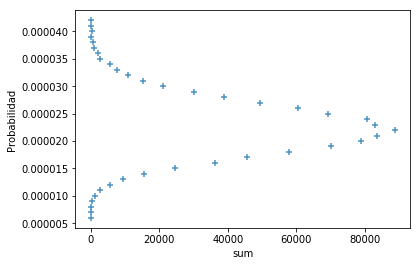

In [11]:
#An we van visualize them:
import seaborn as sns
sns.regplot(x=probs['sum'], y=probs['Probabilidad'], marker="+", fit_reg=False)

In [12]:
#If we look at the above plot, it seems that for this sample, there were some sequences
#repeated more than the rest (probability above 0.0025%), although the majority of them
#appeared between 0.0015% and 0.0025%. Let's see the more frequent sequences:
altas = frecuencia[(frecuencia.Probabilidad > 0.000025)]
altas.head()

,Secuencia,sum,Probabilidad
0,"[1, 1, 1, 1, 1, 1]",26.0,0.000026
10,"[1, 1, 1, 1, 2, 5]",28.0,0.000028
12,"[1, 1, 1, 1, 3, 1]",29.0,0.000029
15,"[1, 1, 1, 1, 3, 4]",29.0,0.000029
16,"[1, 1, 1, 1, 3, 5]",30.0,0.000030


In [13]:
#Which one is the most repeated sequence?
altas_max = frecuencia[(frecuencia.Probabilidad == 0.000042)]
altas_max.head()

,Secuencia,sum,Probabilidad
23671,"[4, 1, 2, 4, 4, 2]",42.0,0.000042


In [14]:
#An the least?
df = frecuencia.sort_values(['Probabilidad'])
df.head()

,Secuencia,sum,Probabilidad
13200,"[2, 5, 2, 1, 5, 1]",6.0,0.000006
5098,"[1, 4, 6, 4, 4, 5]",7.0,0.000007
2859,"[1, 3, 2, 2, 3, 4]",7.0,0.000007
22658,"[3, 6, 3, 6, 3, 3]",7.0,0.000007
11870,"[2, 4, 1, 6, 5, 3]",7.0,0.000007


## EXPERIMENT 2: SIZE OF THE SAMPLE: 10 MILLION

In [3]:
%%timeit
ejemplo = jugada(10000000)
ejemplo.to_csv('ejemplo2.csv',index=False,sep='^', encoding='utf-8')

55.7 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
import numpy as np
resultados2 = pd.read_csv('ejemplo2.csv', header=0, sep='^', encoding='utf-8')
resultados2['Cuenta'] = np.ones(len(resultados2))
resultados2.head()

,Secuencia,Cuenta
0,"[6, 1, 2, 1, 5, 5]",1.0
1,"[6, 5, 6, 3, 5, 3]",1.0
2,"[1, 1, 5, 5, 5, 5]",1.0
3,"[6, 4, 3, 2, 2, 1]",1.0
4,"[2, 1, 5, 3, 5, 5]",1.0


In [16]:
frecuencia2 = pd.DataFrame(pd.pivot_table(resultados2,index=['Secuencia'],values=['Cuenta'],aggfunc=[sum]))
frecuencia2.reset_index(inplace=True)
frecuencia2.columns = frecuencia2.columns.droplevel(1)
frecuencia2.head()

,Secuencia,sum
0,"[1, 1, 1, 1, 1, 1]",201.0
1,"[1, 1, 1, 1, 1, 2]",208.0
2,"[1, 1, 1, 1, 1, 3]",219.0
3,"[1, 1, 1, 1, 1, 4]",230.0
4,"[1, 1, 1, 1, 1, 5]",240.0


In [17]:
frecuencia2['Probabilidad'] = frecuencia2['sum']/10000000
frecuencia2.head()

,Secuencia,sum,Probabilidad
0,"[1, 1, 1, 1, 1, 1]",201.0,0.000020
1,"[1, 1, 1, 1, 1, 2]",208.0,0.000021
2,"[1, 1, 1, 1, 1, 3]",219.0,0.000022
3,"[1, 1, 1, 1, 1, 4]",230.0,0.000023
4,"[1, 1, 1, 1, 1, 5]",240.0,0.000024


In [18]:
probs2 = pd.DataFrame(pd.pivot_table(frecuencia2,index=['Probabilidad'],values=['sum'],aggfunc=[sum]))
probs2.reset_index(inplace=True)
probs2.columns = probs2.columns.droplevel(1)
probs2.head()

,Probabilidad,sum
0,0.000016,157.0
1,0.000016,316.0
2,0.000016,160.0
3,0.000016,164.0
4,0.000017,825.0


In [20]:
probs2.describe()

,Probabilidad,sum
count,113.000000,113.000000
mean,0.000022,88495.575221
std,0.000003,96151.870550
min,0.000016,157.000000
25%,0.000019,4644.000000
50%,0.000022,44164.000000
75%,0.000025,176277.000000
max,0.000028,285272.000000


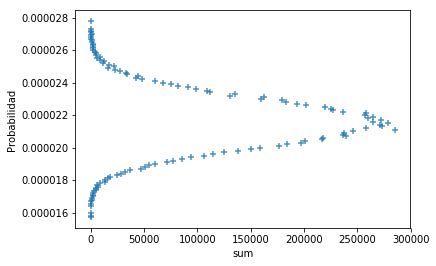

In [19]:
import seaborn as sns
sns.regplot(x=probs2['sum'], y=probs2['Probabilidad'], marker="+", fit_reg=False)

It seems that the maximum and minumun ranges are shrinking, as we can't find any sequence appearing with a 0.0042% anymore (same with the minimum). Also, the figures on top of the curve are starting to converge to a value between 0.0020% and 0.0022%. 

What is the median probability in our first sample? --> 0.0024%

What is the median probability in our second sample? --> 0.0022%

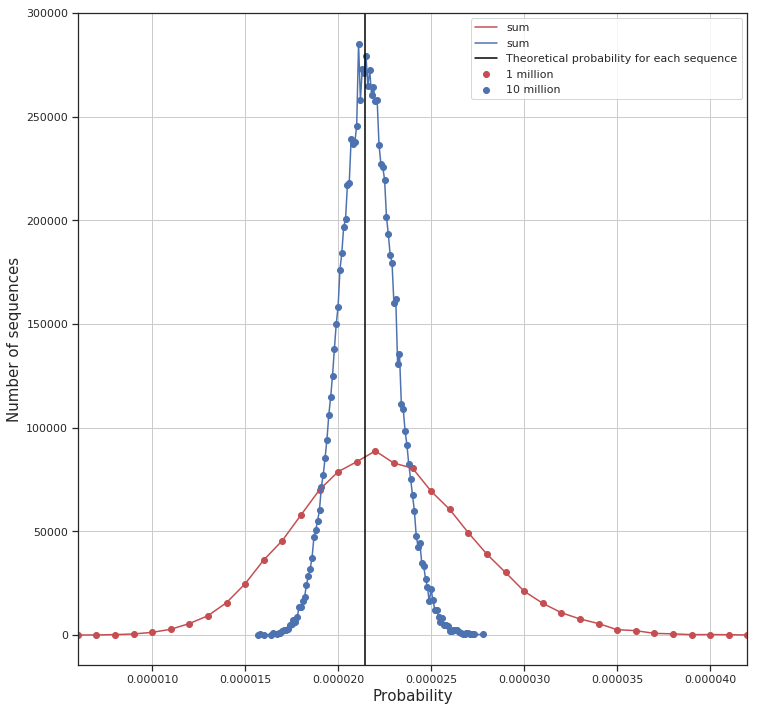

In [134]:
from matplotlib import pyplot as plt
fig, ax= plt.subplots(figsize=(12,12))
ax.scatter(probs['Probabilidad'],probs['sum'], c='r', label='1 million')
ax.scatter(probs2['Probabilidad'],probs2['sum'], c='b',label='10 million')
ax.plot(probs['Probabilidad'],probs['sum'], c='r', label=None)
ax.plot(probs2['Probabilidad'],probs2['sum'], c='b')
ax.set_xlim(0.000006,0.000042)
ax.axvline(0.000021433, color='black', label='Theoretical probability for each sequence')
ax.legend()
ax.set_xlabel('Probability', fontsize=15)
ax.set_ylabel('Number of sequences', fontsize=15)
ax.grid(True)

## EXPERIMENT 3: SIZE OF THE SAMPLE: 100 MILLION

In [139]:
%%timeit
ejemplo = jugada(100000000)
ejemplo.to_csv('ejemplo3.csv',index=False,sep='^', encoding='utf-8')

9min 14s ± 3.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [140]:
import numpy as np
resultados3 = pd.read_csv('ejemplo3.csv', header=0, sep='^', encoding='utf-8')
resultados3['Cuenta'] = np.ones(len(resultados3))
resultados3.head()

,Secuencia,Cuenta
0,"[4, 1, 4, 3, 4, 5]",1.0
1,"[4, 5, 2, 6, 2, 2]",1.0
2,"[5, 2, 5, 2, 2, 6]",1.0
3,"[5, 6, 1, 5, 1, 4]",1.0
4,"[2, 2, 6, 2, 6, 5]",1.0


In [141]:
frecuencia3 = pd.DataFrame(pd.pivot_table(resultados3,index=['Secuencia'],values=['Cuenta'],aggfunc=[sum]))
frecuencia3.reset_index(inplace=True)
frecuencia3.columns = frecuencia3.columns.droplevel(1)
frecuencia3.head()

,Secuencia,sum
0,"[1, 1, 1, 1, 1, 1]",2150.0
1,"[1, 1, 1, 1, 1, 2]",2146.0
2,"[1, 1, 1, 1, 1, 3]",2080.0
3,"[1, 1, 1, 1, 1, 4]",2221.0
4,"[1, 1, 1, 1, 1, 5]",2173.0


In [142]:
frecuencia3['Probabilidad'] = frecuencia3['sum']/100000000

In [143]:
probs3 = pd.DataFrame(pd.pivot_table(frecuencia3,index=['Probabilidad'],values=['sum'],aggfunc=[sum]))
probs3.reset_index(inplace=True)
probs3.columns = probs3.columns.droplevel(1)

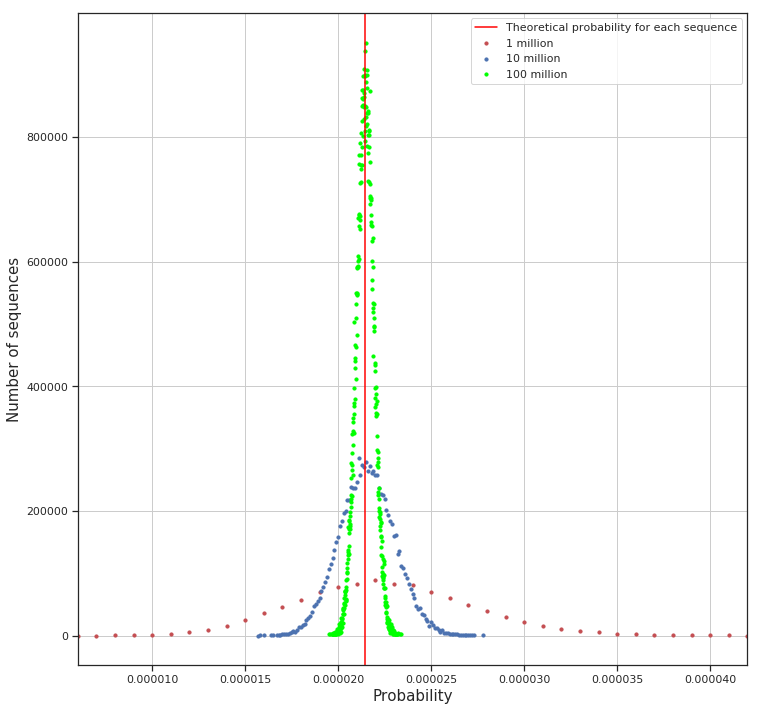

In [151]:
from matplotlib import pyplot as plt
fig, ax= plt.subplots(figsize=(12,12))
ax.scatter(probs['Probabilidad'],probs['sum'],s=10, c='r', label='1 million')
ax.scatter(probs2['Probabilidad'],probs2['sum'],s=10, c='b',label='10 million')
ax.scatter(probs3['Probabilidad'],probs3['sum'],s=10, c='lime',label='100 million')
ax.set_xlim(0.000006,0.000042)
ax.axvline(0.000021433, color='red', label='Theoretical probability for each sequence')
ax.legend()
ax.set_xlabel('Probability', fontsize=15)
ax.set_ylabel('Number of sequences', fontsize=15)
ax.grid(True)

We can see that, as the sample's size increases, the majority of the sequences tend to allign their probability with the theoretical value: 0.0021%